<a href="https://colab.research.google.com/github/shivamrawat007/big-basket-analysis/blob/main/Big_Basket_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of BigBasket Products.csv")

In [ ]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(27555, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


In [ ]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


In [ ]:
df.isnull().sum().sum()

8759

<Axes: >

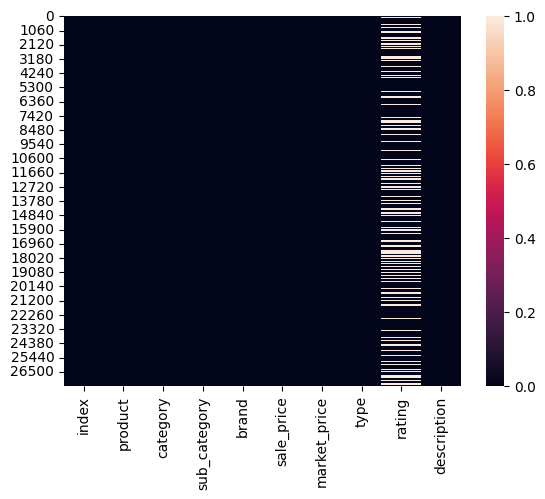

In [ ]:
sns.heatmap(df.isnull())

**Handeling Missing Values**









In [ ]:
df_int = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
df['product'].fillna('unknown',inplace = True)
df['category'].fillna('unknown',inplace = True)

<ipython-input-17-faefcc0943b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product'].fillna('unknown',inplace = True)
<ipython-input-17-faefcc0943b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<ipython-input-18-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


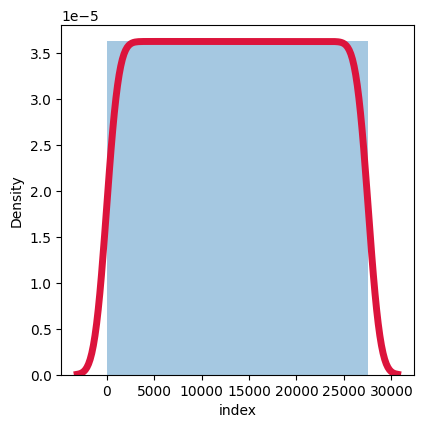

<ipython-input-18-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


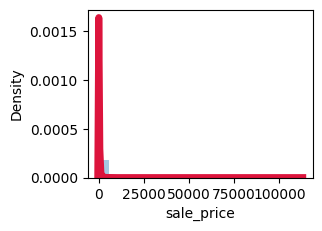

<ipython-input-18-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


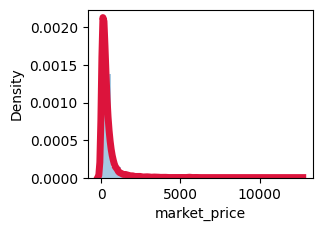

<ipython-input-18-d55917b4c235>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


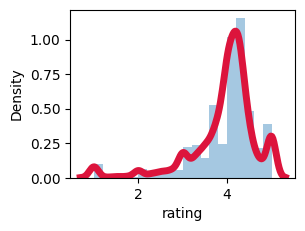

In [ ]:
plt.figure(figsize = (10,10))
for i,num in enumerate(df_int):
  plt.subplot(2,2,i+1)
  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })
  plt.show()

In [ ]:
median_sale_price = df['sale_price'].median()
median_sale_price

190.32

In [ ]:
df['sale_price'].fillna(median_sale_price,inplace = True)

<ipython-input-20-d2aef10ab68f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sale_price'].fillna(median_sale_price,inplace = True)


In [ ]:
median_rating = df['rating'].median()
median_rating

4.1

In [ ]:
df['rating'].fillna(median_rating,inplace = True)

<ipython-input-22-892a9cdda071>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating,inplace = True)


In [ ]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,0
description,115


In [ ]:
df['description'].fillna('No description',inplace = True)

<ipython-input-24-94801d91f8d9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('No description',inplace = True)


In [ ]:
df['brand'].fillna('brand not be provided',inplace = True)

<ipython-input-25-f69b0b84f798>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('brand not be provided',inplace = True)


In [ ]:
df.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


<Axes: >

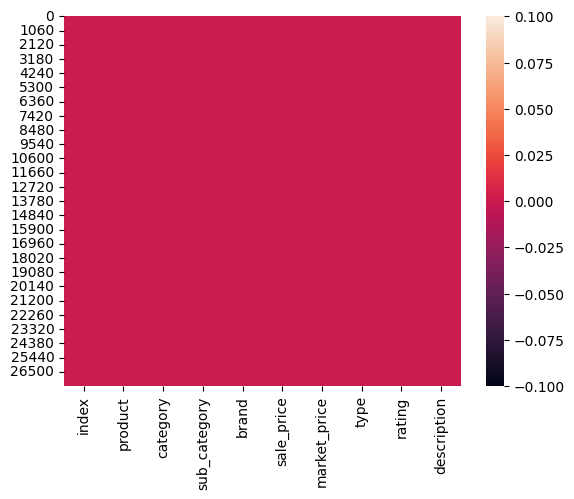

In [ ]:
sns.heatmap(df.isnull())

Handeling Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='sale_price'>

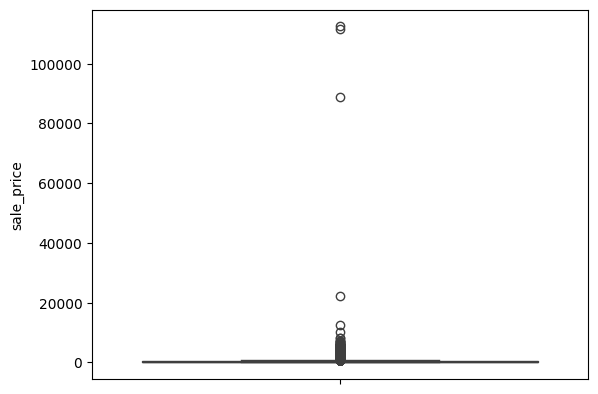

In [ ]:
sns.boxplot(df['sale_price'])

In [ ]:
Q1 = df['sale_price'].quantile(0.25)
print(Q1)
Q3 = df['sale_price'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

95.0
359.0
264.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-301.0
755.0


In [ ]:
df['sale_price'] = np.where(df['sale_price'] > upper_bound,upper_bound,df['sale_price'])
df['sale_price'] = np.where(df['sale_price'] < lower_bound,lower_bound,df['sale_price'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


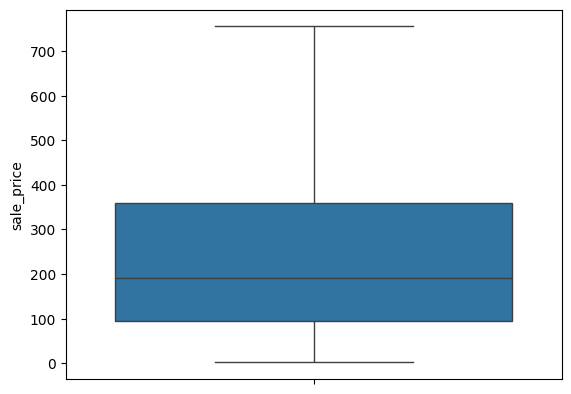

In [ ]:
sns.boxplot(df['sale_price'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='market_price'>

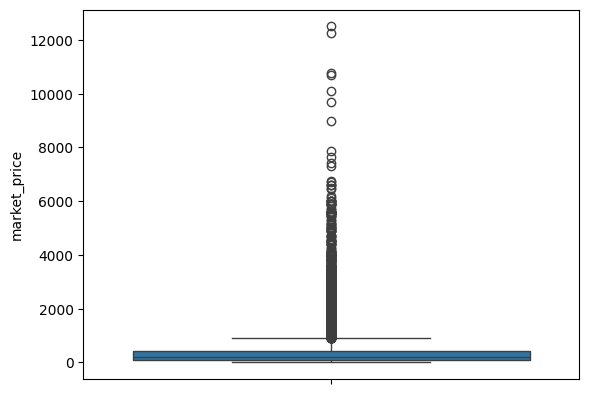

In [ ]:
sns.boxplot(df['market_price'])

In [ ]:
Q1 = df['market_price'].quantile(0.25)
print(Q1)
Q3 = df['market_price'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

100.0
425.0
325.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-387.5
912.5


In [ ]:
df['market_price'] = np.where(df['market_price'] > upper_bound,upper_bound,df['market_price'])
df['market_price'] = np.where(df['market_price'] < lower_bound,lower_bound,df['market_price'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


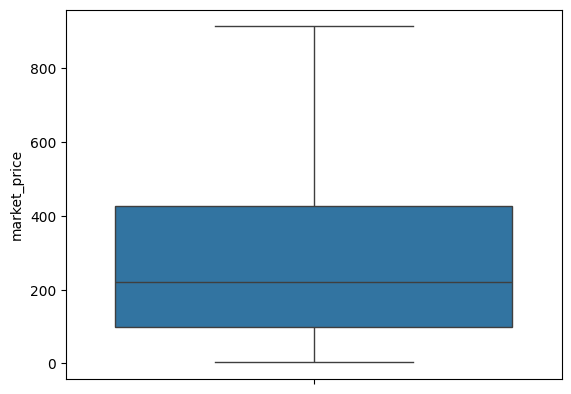

In [ ]:
sns.boxplot(df['market_price'])
plt.show()

Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

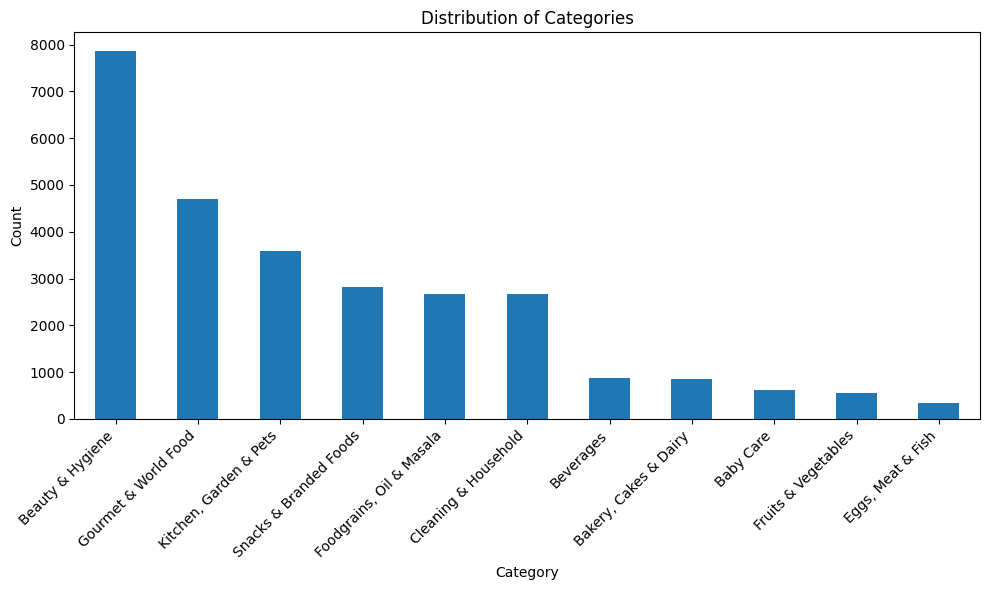

In [ ]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

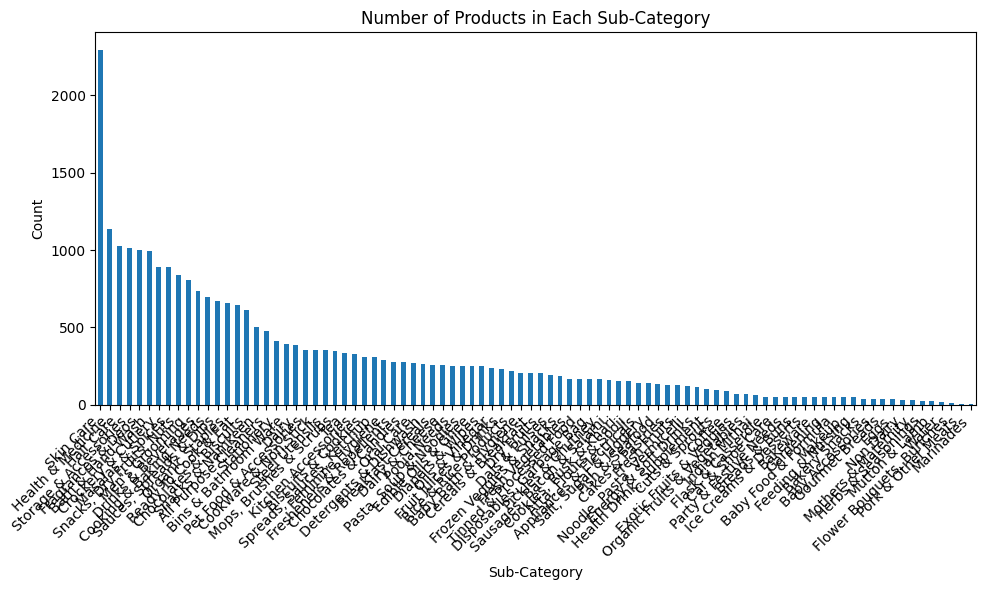

In [ ]:
sub_category_counts = df['sub_category'].value_counts()
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Number of Products in Each Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total sales for each product
df['total_sales'] = df['sale_price'] * df['rating']

# Group by product and sum total sales
product_sales = df.groupby('product')['total_sales'].sum().reset_index()

# Sort by total sales in descending order and select top 10
top_12_products = product_sales.sort_values(by=['total_sales'], ascending=False).head(12)

# Create the bar chart using Plotly
fig = px.bar(top_12_products, x='product', y='total_sales',
             title='Top 12 Products by Total Sales',
             labels={'product': 'Product', 'total_sales': 'Total Sales'})
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig.show()

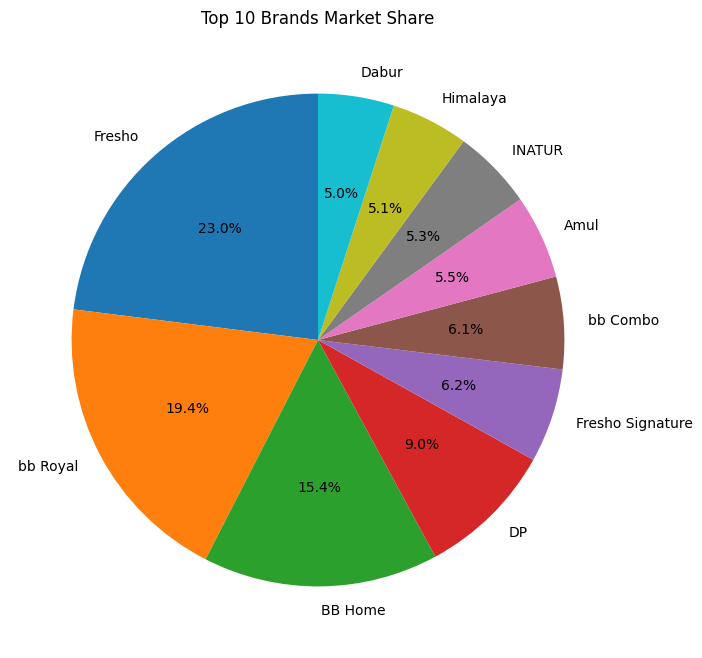

In [ ]:
# Brand Performance and Market Share
brand_market_share = df['brand'].value_counts(normalize=True) * 100

# Select top N brands for visualization (adjust N as needed)
top_n_brands = 10
top_brands = brand_market_share.head(top_n_brands)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top {top_n_brands} Brands Market Share')
plt.show()

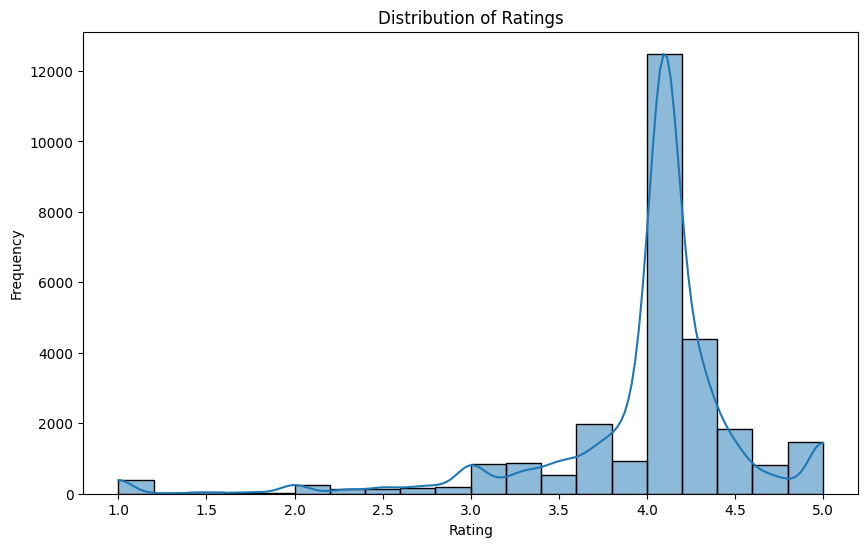

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

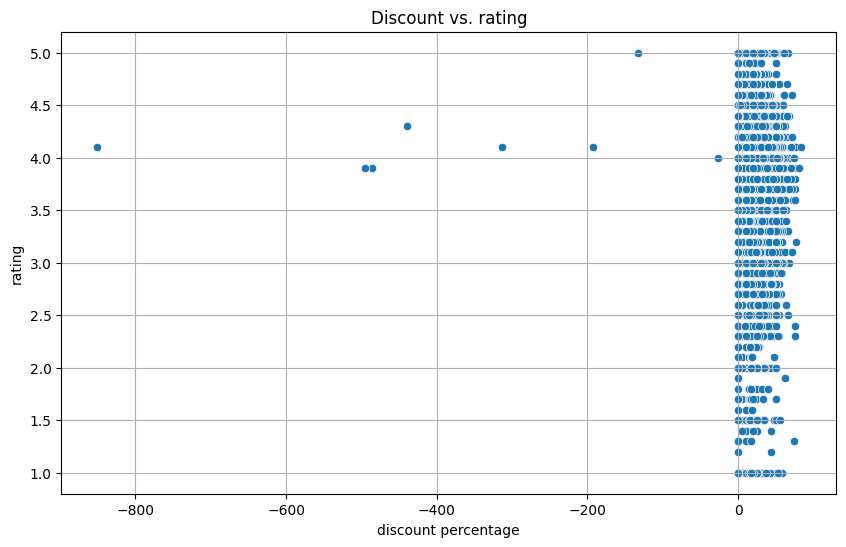

In [ ]:

df['discount_percentage'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100
df['discount_percentage'] = df['discount_percentage']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.xlabel('discount percentage')
plt.ylabel('rating')
plt.title('Discount vs. rating')
plt.grid(True)
plt.show()


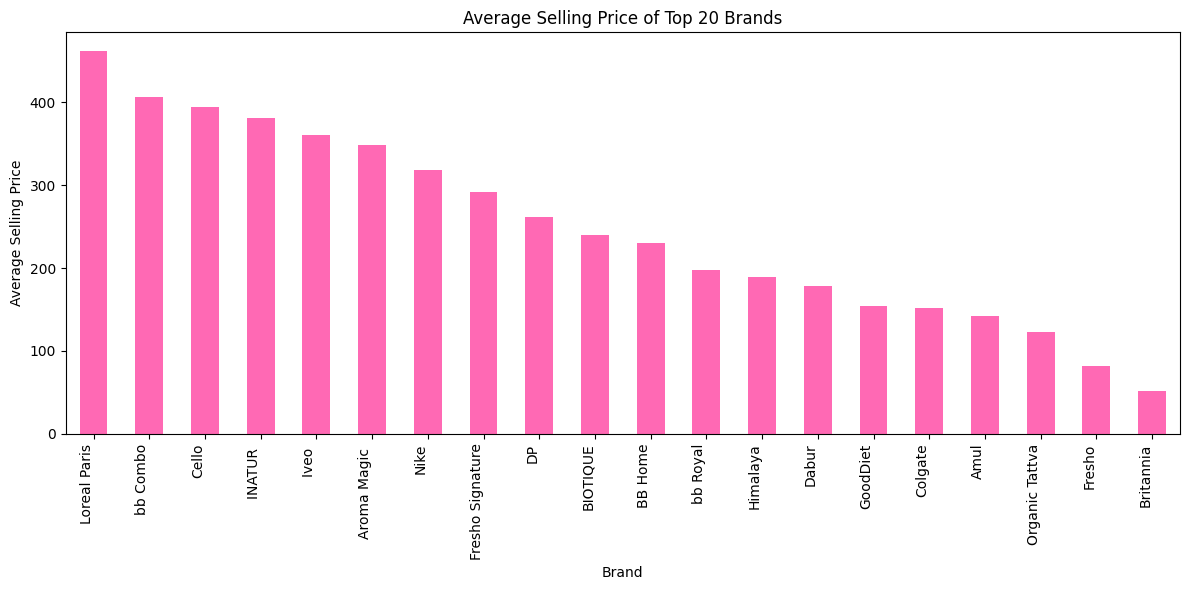

In [ ]:
#average selling price of top 20 brands make agraph
top_n_brands = 20
top_brands = df['brand'].value_counts().head(top_n_brands).index
top_brand_data = df[df['brand'].isin(top_brands)]
brand_avg_price = top_brand_data.groupby('brand')['sale_price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
brand_avg_price.plot(kind='bar', color='hotpink')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price of Top 20 Brands')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

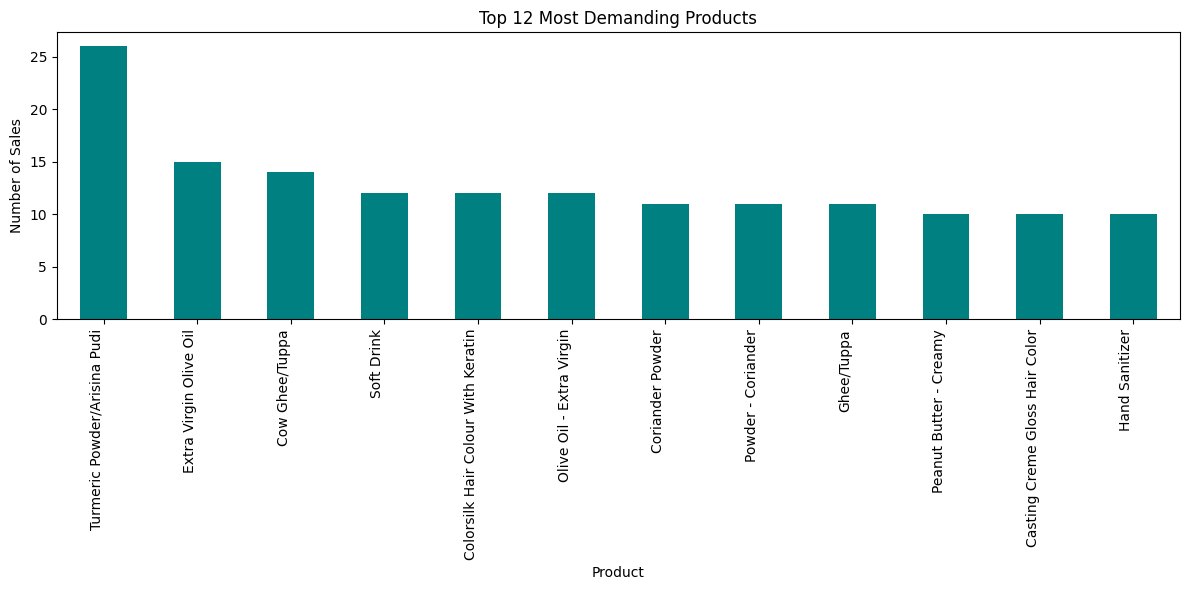

In [ ]:
#make a graph on most demanding products
product_counts = df['product'].value_counts().head(12)  # Adjust the number as needed

plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='teal')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.title('Top 12 Most Demanding Products')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


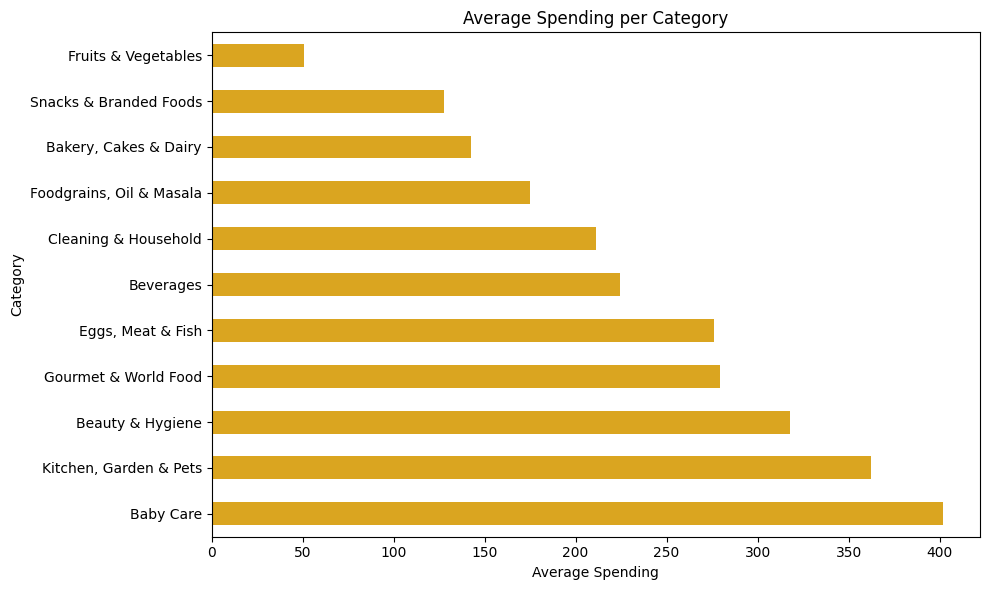

In [ ]:
category_avg_spending = df.groupby('category')['sale_price'].mean().sort_values(ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
category_avg_spending.plot(kind='barh', color='goldenrod')
plt.xlabel('Average Spending')
plt.ylabel('Category')
plt.title('Average Spending per Category')
plt.tight_layout()
plt.show()